# P02_3_Modeling

Grid search the XGBoost algorithm

## import libraries

In [1]:
import pandas as pd
import numpy as np
import regex as re
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import pickle
from sklearn.pipeline import make_pipeline, Pipeline

import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import re
from tqdm import tqdm
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer

In [3]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler

In [4]:
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedStratifiedKFold

In [5]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [7]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [8]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot


In [10]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

In [11]:
import seaborn as sns
from sklearn.model_selection import train_test_split

In [12]:
%config InlineBackend.figure_format = 'retina'

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# Read data set

In [15]:
file_path = "../DataSet/"
file_name = "exercise_40_train.csv"
df = pd.read_csv(file_path+file_name)

In [16]:
df.shape

(40000, 101)

In [17]:
df.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,0,0.165254,18.060003,Wed,1.077380,-1.339233,-1.584341,0.0062%,0.220784,1.816481,...,-0.397427,0.909479,no,5.492487,NaN,10.255579,7.627730,0,yes,104.251338
1,1,2.441471,18.416307,Friday,1.482586,0.920817,-0.759931,0.0064%,1.192441,3.513950,...,0.656651,9.093466,no,3.346429,4.321172,NaN,10.505284,1,yes,101.230645
2,1,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8e-04%,0.952323,0.782974,...,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215
3,0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.0057%,-0.520756,1.825586,...,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970
4,0,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.0109%,-0.732739,2.151990,...,3.003595,1.046096,yes,3.234033,2.074927,9.987006,11.702664,0,yes,92.925935


select the numeric features

In [18]:
df_numeric_features = df.drop(['y'],axis=1)

In [19]:
df.dtypes.value_counts()

float64    86
object     12
int64       3
dtype: int64

In [20]:
df_numeric_features = df.select_dtypes(include=['float64', 'int64'])
df_numeric_features = df_numeric_features.drop(['y'],axis=1)

In [21]:
df_cat_features = df.select_dtypes(include=['object'])
df_cat_features.head()

,x3,x7,x19,x24,x31,x33,x39,x60,x65,x77,x93,x99
0,Wed,0.0062%,$-908.650758424405,female,no,Colorado,5-10 miles,August,farmers,mercedes,no,yes
1,Friday,0.0064%,$-1864.9622875143,male,no,Tennessee,5-10 miles,April,allstate,mercedes,no,yes
2,Thursday,-8e-04%,$-543.187402955527,male,no,Texas,5-10 miles,September,geico,subaru,no,yes
3,Tuesday,-0.0057%,$-182.626380634258,male,no,Minnesota,5-10 miles,September,geico,nissan,no,yes
4,Sunday,0.0109%,$967.007090837503,male,yes,New York,5-10 miles,January,geico,toyota,yes,yes


# Make custom transformation for categorical features

In [22]:
def custom_edit_x3(df_categ):
    
    # https://stackoverflow.com/questions/60237488/python-replace-only-exact-word-in-string
    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bTue\b', 'Tuesday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bSun\b', 'Sunday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bSat\b', 'Saturday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bFri\b', 'Friday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bWed\b', 'Wednesday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bMon\b', 'Monday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bThur\b', 'Thursday', string)
    return df_categ
    
    return df_categ

make a column transformer fucntion and make sure it works

In [23]:
custom_edit_x3_tf = FunctionTransformer(custom_edit_x3)
ct = make_column_transformer((custom_edit_x3_tf, ['x3']))

make a pipe line and check out the customized transformer

In [24]:
x3_pipe = make_pipeline(custom_edit_x3_tf, SimpleImputer(strategy="most_frequent"), OneHotEncoder())
ct = make_column_transformer((x3_pipe, ['x3']))
ct.fit_transform(df).toarray()[0].size

7

write customized transformer for x7 and x19 features

In [25]:
def custom_edit_x7(df):
    df = df.apply(lambda x: (x.str.replace('%','')))

    return (np.float_(df))

custom_edit_x7_tf = FunctionTransformer(custom_edit_x7)
ct = make_column_transformer((custom_edit_x7_tf, ['x7']))
x7 = ct.fit_transform(df)

In [26]:
def custom_edit_x19(df):
    df = df.apply(lambda x: (x.str.replace('$','')))

    return (np.float_(df))

custom_edit_x19_tf = FunctionTransformer(custom_edit_x19)
ct = make_column_transformer((custom_edit_x19_tf, ['x19']))
x19 = ct.fit_transform(df)

check out the customized transformers using pipeline

In [27]:
two_step_transformer_pipe = make_pipeline(SimpleImputer(strategy="most_frequent"), 
                                                     OneHotEncoder())

In [28]:
two_step_transformer_pipe.fit_transform(df[['x24','x31','x33','x60','x65','x77','x93']]).toarray()[0].size

81

check out the last two pipelines in column transformer

In [29]:
ct = make_column_transformer((x3_pipe, ['x3']),
                             (two_step_transformer_pipe, ['x24','x31','x33','x60','x65','x77','x93']),
                            )

In [30]:
ct.fit_transform(df).toarray()[0].size

88

make a pipeline for three features inclduing x59, x79, and x98. these are numeric features with 0-1 values. Apply one hot encder.

In [31]:
numer_OHE_x59_x79_x98 = make_pipeline(SimpleImputer(strategy="most_frequent"), 
                                        OneHotEncoder())

numer_OHE_x59_x79_x98.fit_transform(np.array(df['x59']).reshape(-1, 1)).toarray()[0].size

2

In [32]:
# len(numer_OHE_x59_x79_x98.fit_transform(np.array(df['x59']).reshape(-1, 1)).toarray())

check out if the new pipeline works

In [33]:
ct = make_column_transformer((numer_OHE_x59_x79_x98, ['x59', 'x79', 'x98']))

In [34]:
ct.fit_transform(df)

array([[1., 0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 1., 0.],
       ...,
       [1., 0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 1., 0.],
       [0., 1., 0., 1., 0., 1.]])

the pipeline works just fine. 


make a new pipeline for numeric features which were skewed and check it out if it works flawlessly.

In [35]:
numer_skewness = make_pipeline(SimpleImputer(strategy="mean"), 
                               StandardScaler(),
                                PowerTransformer(),
#                                VarianceThreshold(),
                              )

numer_skewness.fit_transform(np.array(df['x13']).reshape(-1, 1))

array([[ 0.52252661],
       [-0.98789216],
       [-1.11580409],
       ...,
       [-0.26185934],
       [-2.10399184],
       [-0.25390223]])

feed the new pipeline into the column transformer and check it out.

In [36]:
ct = make_column_transformer((numer_skewness, ['x13', 'x21', 'x32', 'x35', 
                                               'x44', 'x59', 'x67', 'x73', 
                                               'x75', 'x79', 'x84', 'x89']))

In [37]:
ct.fit_transform(df)

array([[ 0.52252661,  1.6190496 , -0.68519579, ...,  0.42510903,
        -2.88844405,  0.15809134],
       [-0.98789216, -0.40425833,  0.60652813, ..., -1.8907331 ,
         0.0591937 ,  0.08691384],
       [-1.11580409,  0.16008288,  1.24974419, ...,  0.42510903,
         0.0591937 ,  0.21667148],
       ...,
       [-0.26185934, -0.73586194,  0.13156308, ...,  0.42510903,
         2.05710353, -1.38447206],
       [-2.10399184,  0.05575166,  1.33614618, ...,  0.42510903,
         0.0591937 ,  0.21667148],
       [-0.25390223, -0.87867438,  0.34614004, ...,  0.42510903,
         0.0591937 ,  0.21667148]])

make a pipeline for rest of numeric features and check it out

In [38]:
rest_numeric_features = []
for col in df_numeric_features.columns:
    if col != ['x13', 'x21', 'x32', 'x35', 'x44', 'x59', 'x67', 'x73', 'x75', 'x79', 'x84', 'x89']:
        rest_numeric_features.append(col)
print(rest_numeric_features)       

['x1', 'x2', 'x4', 'x5', 'x6', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x20', 'x21', 'x22', 'x23', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x32', 'x34', 'x35', 'x36', 'x37', 'x38', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x61', 'x62', 'x63', 'x64', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x94', 'x95', 'x96', 'x97', 'x98', 'x100']


In [39]:
Rest_numeric_features = make_pipeline(SimpleImputer(strategy="mean"), 
                               StandardScaler(),
                                PowerTransformer(),
#                                VarianceThreshold(),
#                             PCA(n_components=20),
                                     )

# Rest_numeric_features.fit_transform(np.array(df['x1']).reshape(-1, 1))

In [40]:
ct = make_column_transformer((Rest_numeric_features, rest_numeric_features))

In [41]:
ct.fit_transform(df)

array([[-1.52210183, -1.21321633,  0.73538846, ..., -1.19734632,
        -0.99531099,  0.80499414],
       [-0.21778515, -0.99034322,  1.01178638, ...,  0.25640949,
         1.0047111 ,  0.22810827],
       [ 0.75277741, -0.50800169,  0.09907159, ..., -1.10434356,
        -0.99531099,  1.77989024],
       ...,
       [-0.62132649, -1.36064831, -0.39842492, ..., -1.17905537,
         1.0047111 , -0.0022491 ],
       [ 0.53960265,  0.17657422,  0.29347708, ..., -0.68188951,
        -0.99531099,  1.80192371],
       [-0.14750603, -2.22596216, -0.79910404, ...,  1.26723974,
         1.0047111 ,  1.96954651]])

# Combining all transformers into one 

In [42]:
# x3 pipe
x3_pipe = Pipeline([('custom_edit_x3_tf', custom_edit_x3_tf), 
                   ('imp', SimpleImputer(strategy="most_frequent")), 
                   ('ohe', OneHotEncoder())])
# two tf pipe
two_step_transformer_pipe = Pipeline([('imp', SimpleImputer(strategy="most_frequent")), 
                                                     ('ohe',OneHotEncoder())])

# numeric -> categ OHE pipe
numer_OHE_x59_x79_x98_pipe = Pipeline([('imp_ohe', SimpleImputer(strategy="most_frequent")), 
                                        ('ohe',OneHotEncoder())])

# numeric skewness tf
numer_skewness_pipe = Pipeline([('imp',SimpleImputer(strategy="mean")), 
                               ('scaler',StandardScaler()),
                                ('p_tf',PowerTransformer()),
                               ('selector',VarianceThreshold()),
                              ])

# custom x7 tf
custom_edit_x7_tf = FunctionTransformer(custom_edit_x7)
# custom x19 tf
custom_edit_x19_tf = FunctionTransformer(custom_edit_x19)


# rest on nemeric feature pipe
Rest_numeric_features_pipe = Pipeline([('imp',SimpleImputer(strategy="mean")), 
                               ('scaler',StandardScaler()),
                                ('p_tf',PowerTransformer()),
                               ('selector',VarianceThreshold()),
#                             PCA(n_components=20),
                                     ])

In [43]:
preprocessor = make_column_transformer((x3_pipe, ['x3']),
                            (two_step_transformer_pipe, ['x24','x31','x33','x60','x65','x77','x93']),
                            (numer_OHE_x59_x79_x98_pipe, ['x59', 'x79', 'x98']),
                             
                             # features with high skewness 
                            (numer_skewness_pipe, ['x13', 'x21', 'x32', 'x35', 
                                              'x44', 'x59', 'x67', 'x73', 
                                              'x75', 'x79', 'x84', 'x89']),
                             
                             # features from categories-> edited to numeric-no null found
                             (custom_edit_x7_tf, ['x7']),
                             (custom_edit_x19_tf, ['x19']),
                             
                             # rest numeric features
                             (Rest_numeric_features_pipe, rest_numeric_features),
                             )

preprocessor.fit_transform(df)[0].size

196

In [44]:
preprocessor.named_transformers_

{'pipeline-1': Pipeline(steps=[('custom_edit_x3_tf',
                  FunctionTransformer(func=<function custom_edit_x3 at 0x7f9aa1d2d620>)),
                 ('imp', SimpleImputer(strategy='most_frequent')),
                 ('ohe', OneHotEncoder())]),
 'pipeline-2': Pipeline(steps=[('imp', SimpleImputer(strategy='most_frequent')),
                 ('ohe', OneHotEncoder())]),
 'pipeline-3': Pipeline(steps=[('imp_ohe', SimpleImputer(strategy='most_frequent')),
                 ('ohe', OneHotEncoder())]),
 'pipeline-4': Pipeline(steps=[('imp', SimpleImputer()), ('scaler', StandardScaler()),
                 ('p_tf', PowerTransformer()),
                 ('selector', VarianceThreshold())]),
 'functiontransformer-1': FunctionTransformer(func=<function custom_edit_x7 at 0x7f9aa1d2dae8>),
 'functiontransformer-2': FunctionTransformer(func=<function custom_edit_x19 at 0x7f9a893371e0>),
 'pipeline-5': Pipeline(steps=[('imp', SimpleImputer()), ('scaler', StandardScaler()),
                 ('

so far so good.

In [45]:
X_all_features = df.drop(columns=['y'], axis=1)
y = df['y']

# Pipes & transformers using Gradient Boosting classifier


In [46]:
Final_pipe_GB = Pipeline(steps=[('preprocessor', 
                                 preprocessor),
                                ('classiffier', 
                                 GradientBoostingClassifier(n_estimators=150, 
                                                            learning_rate=1.0,
                                                            max_depth=2, 
                                                            random_state=0))])

Final_pipe_GB.fit(X_all_features,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('custom_edit_x3_tf',
                                                                   FunctionTransformer(func=<function custom_edit_x3 at 0x7f9aa1d2d620>)),
                                                                  ('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['x3']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                          

In [47]:
cross_val_score(Final_pipe_GB, df, y, cv=5, 
                scoring='roc_auc', n_jobs=-1).mean()

0.7654068695368681

# Grid Search on XGBoost

In [48]:
preprocessor.named_transformers_

{'pipeline-1': Pipeline(steps=[('custom_edit_x3_tf',
                  FunctionTransformer(func=<function custom_edit_x3 at 0x7f9aa1d2d620>)),
                 ('imp', SimpleImputer(strategy='most_frequent')),
                 ('ohe', OneHotEncoder())]),
 'pipeline-2': Pipeline(steps=[('imp', SimpleImputer(strategy='most_frequent')),
                 ('ohe', OneHotEncoder())]),
 'pipeline-3': Pipeline(steps=[('imp_ohe', SimpleImputer(strategy='most_frequent')),
                 ('ohe', OneHotEncoder())]),
 'pipeline-4': Pipeline(steps=[('imp', SimpleImputer()), ('scaler', StandardScaler()),
                 ('p_tf', PowerTransformer()),
                 ('selector', VarianceThreshold())]),
 'functiontransformer-1': FunctionTransformer(func=<function custom_edit_x7 at 0x7f9aa1d2dae8>),
 'functiontransformer-2': FunctionTransformer(func=<function custom_edit_x19 at 0x7f9a893371e0>),
 'pipeline-5': Pipeline(steps=[('imp', SimpleImputer()), ('scaler', StandardScaler()),
                 ('

In [49]:
params = {}
params['preprocessor__pipeline-4__selector__threshold']=[0.01, 0.2]


In [50]:
grid = GridSearchCV(Final_pipe_GB, params, 
                    cv=5, scoring='roc_auc',n_jobs=-1)

In [51]:
grid.fit(X_all_features, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('custom_edit_x3_tf',
                                                                                          FunctionTransformer(func=<function custom_edit_x3 at 0x7f9aa1d2d620>)),
                                                                                         ('imp',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder())]),
                                                                         ['x3']),
                                               

In [52]:
grid.best_params_

{'preprocessor__pipeline-4__selector__threshold': 0.01}

In [53]:
grid.best_score_

0.7654068695368681

# RandomizedCV Search

In [54]:
params = {}
params['preprocessor__pipeline-4__selector__threshold']=[0.01, 0.03, 0.05,0.07, 0.1]
params['preprocessor__pipeline-5__selector__threshold']=[0.01, 0.03, 0.05,0.07, 0.1]
params['classiffier__learning_rate']=[0.1, 0.3, 1, 2]
params['classiffier__max_depth']=[1, 2, 3, 4, 5]
params['classiffier__n_estimators']=[40, 100, 120,200]

In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [56]:
rand = RandomizedSearchCV(Final_pipe_GB, params, n_iter=10, random_state=1,
                    cv=5, scoring='roc_auc',n_jobs=-1)

In [57]:
%time
rand.fit(X_all_features, y)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 10 µs


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('custom_edit_x3_tf',
                                                                                                FunctionTransformer(func=<function custom_edit_x3 at 0x7f9aa1d2d620>)),
                                                                                               ('imp',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder())]),
                                                                           

In [58]:
rand.best_params_

{'preprocessor__pipeline-5__selector__threshold': 0.01,
 'preprocessor__pipeline-4__selector__threshold': 0.05,
 'classiffier__n_estimators': 100,
 'classiffier__max_depth': 3,
 'classiffier__learning_rate': 0.1}

In [59]:
rand.best_score_

0.7945098461992404

update the final pipeline using best score and apply it on train and later use it for prediction test data set.

In [60]:
# x3 pipe
x3_pipe = Pipeline([('custom_edit_x3_tf', custom_edit_x3_tf), 
                   ('imp', SimpleImputer(strategy="most_frequent")), 
                   ('ohe', OneHotEncoder())])
# two tf pipe
two_step_transformer_pipe = Pipeline([('imp', SimpleImputer(strategy="most_frequent")), 
                                                     ('ohe',OneHotEncoder())])

# numeric -> categ OHE pipe
numer_OHE_x59_x79_x98_pipe = Pipeline([('imp_ohe', SimpleImputer(strategy="most_frequent")), 
                                        ('ohe',OneHotEncoder())])

# numeric skewness tf
numer_skewness_pipe = Pipeline([('imp',SimpleImputer(strategy="mean")), 
                               ('scaler',StandardScaler()),
                                ('p_tf',PowerTransformer()),
                               ('selector',VarianceThreshold(0.01)),
                              ])

# custom x7 tf
custom_edit_x7_tf = FunctionTransformer(custom_edit_x7)
# custom x19 tf
custom_edit_x19_tf = FunctionTransformer(custom_edit_x19)


# rest on nemeric feature pipe
Rest_numeric_features_pipe = Pipeline([('imp',SimpleImputer(strategy="mean")), 
                               ('scaler',StandardScaler()),
                                ('p_tf',PowerTransformer()),
                               ('selector',VarianceThreshold(0.05)),
#                             PCA(n_components=20),
                                     ])

In [61]:
Final_pipe_GB = Pipeline(steps=[('preprocessor', 
                                 preprocessor),
                                ('classiffier', 
                                 GradientBoostingClassifier(n_estimators=100, 
                                                            learning_rate=0.1,
                                                            max_depth=3, 
                                                            random_state=0))])

Final_pipe_GB.fit(X_all_features,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('custom_edit_x3_tf',
                                                                   FunctionTransformer(func=<function custom_edit_x3 at 0x7f9aa1d2d620>)),
                                                                  ('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['x3']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                          

## save pipeline

In [62]:
# save the pipeline to a file
import joblib
joblib.dump(Final_pipe_GB, '../pipelines/Final_pipe_GB_P02_3_Modeling_auc0_83.joblib')

['../pipelines/Final_pipe_GB_P02_3_Modeling_auc0_83.joblib']

In [63]:
y_pred = Final_pipe_GB.predict(X_all_features)
y_prob = Final_pipe_GB.predict_proba(X_all_features)

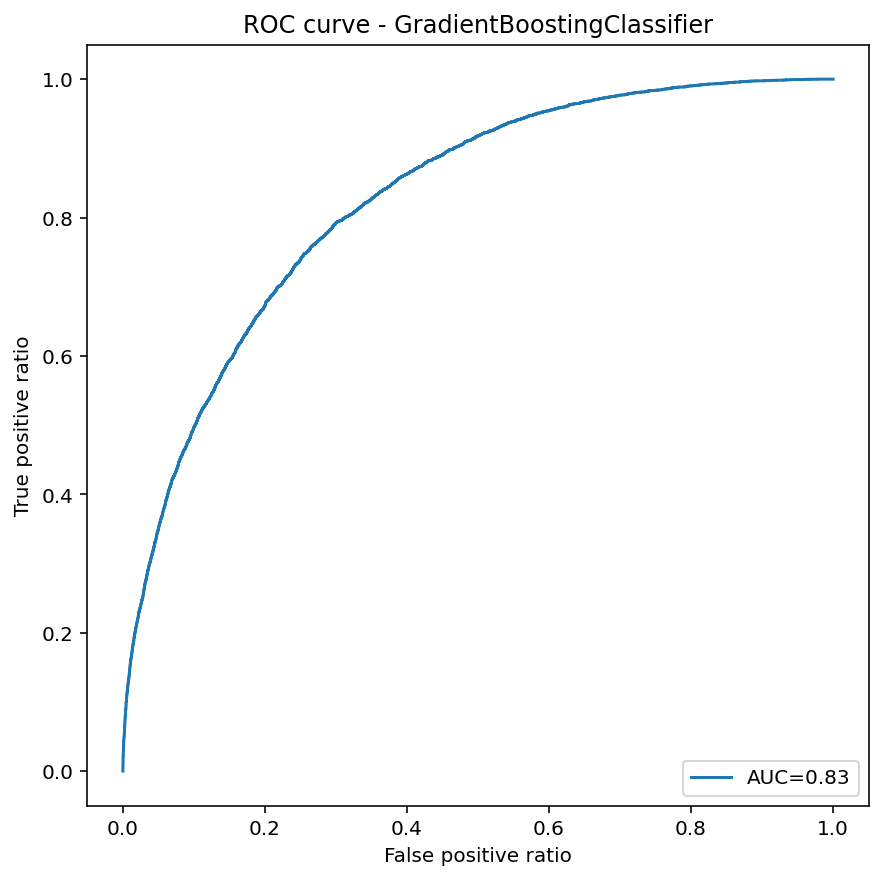

In [64]:
plt.figure(figsize=(7,7))
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
fpr_gb, tpr_gb, _ = metrics.roc_curve(y,  y_prob[:,1])
auc_gb = metrics.roc_auc_score(y, y_prob[:,1])
plt.plot(fpr_gb,tpr_gb, label="AUC="+str(round(auc_gb,2)))
plt.legend(loc=4)
plt.xlabel('False positive ratio')
plt.ylabel('True positive ratio')
plt.title('ROC curve - GradientBoostingClassifier')
plt.savefig("../Figures/plot_02_2_roc_GB.png")
plt.show()

Accuracy, Precision, Recall
 0.86725 0.7345385347288297 0.13303463725659143


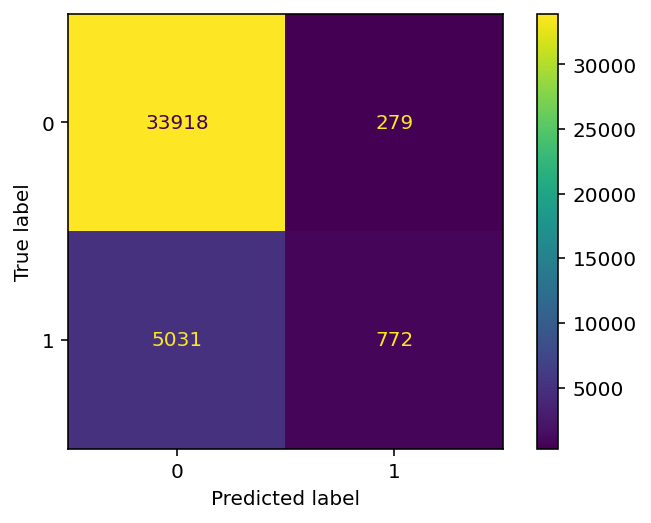

In [65]:
preds = Final_pipe_GB.predict(X_all_features)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y, preds).ravel()

# View confusion matrix

plot_confusion_matrix(Final_pipe_GB, X_all_features, y, 
#                       cmap='seismic', 
                     values_format='d')

Accuracy = (tp + tn) / (tp + tn + fp + fn)
Precision = tp / (tp + fp)
Recall = tp / (tp + fn)

print('Accuracy, Precision, Recall\n',Accuracy, Precision, Recall)
plt.savefig("../Figures/plot_02_2_GB_confusionmat.png")

# Results

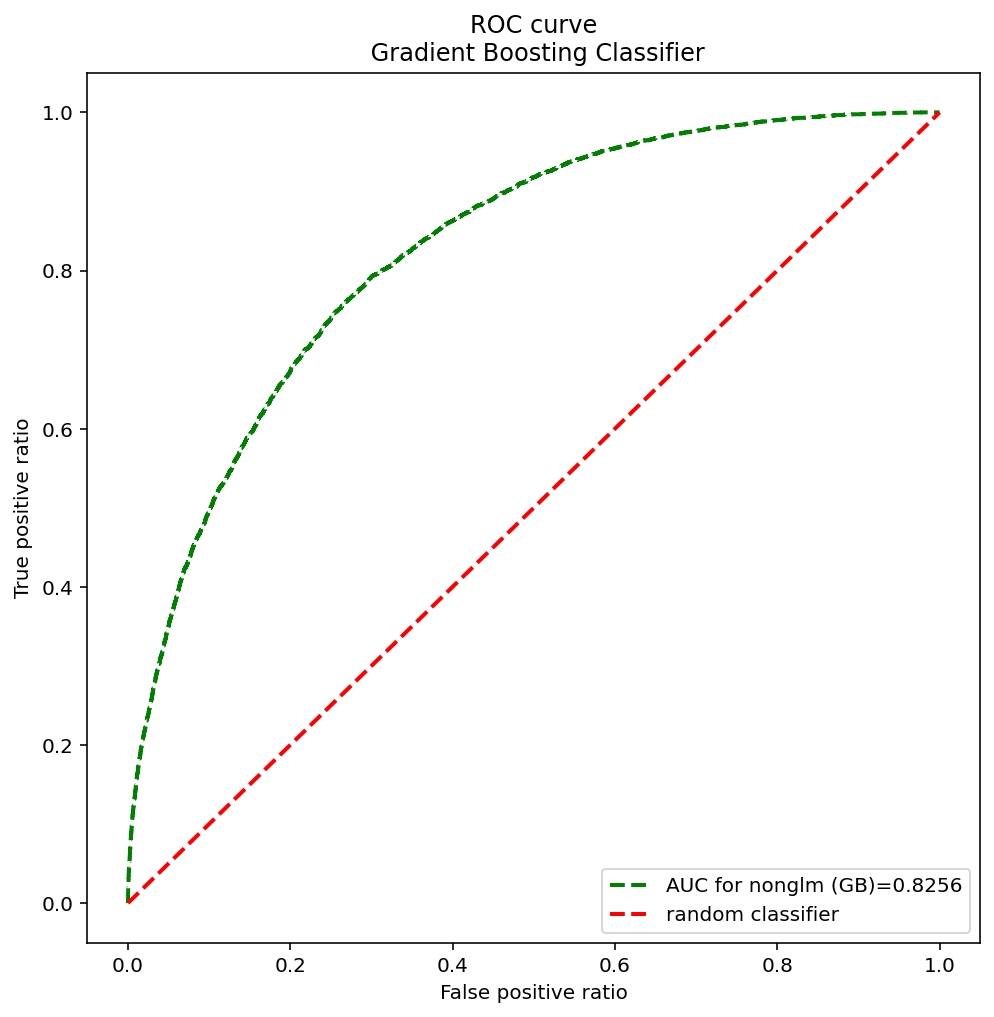

In [66]:
plt.figure(figsize=(8,8))
plt.plot(fpr_gb,tpr_gb, 'g--', linewidth=2, markersize=2,
         label="AUC for nonglm (GB)="+str(round(auc_gb,4)))

# plt.plot(fpr_mlp,tpr_mlp, 'b--', linewidth=2, markersize=2,
#          label="AUC MLP="+str(round(auc_mlp,4)))

# plt.plot(fpr_lr,tpr_lr, 'k--', linewidth=2, markersize=2,
#          label="AUC for glm (lr)="+str(round(auc_lr,4)))

plt.plot([0,1],[0,1], 'r--', linewidth=2, markersize=2,
         label='random classifier')

plt.legend(loc=4)
plt.xlabel('False positive ratio')
plt.ylabel('True positive ratio')
plt.title('ROC curve\n Gradient Boosting Classifier')

plt.savefig("../Figures/plot_02_3_roc_GB.png")
plt.show()

# Test the pipeline on test set

load test data set

In [67]:
file_path = "../DataSet/"
file_name = "exercise_40_test.csv"
df_test = pd.read_csv(file_path+file_name)

predict using non-glm model 

In [68]:
y_pred_nonglmresults = Final_pipe_GB.predict_proba(df_test)
y_pred_nonglmresults_1 = y_pred_nonglmresults[:,1]

file_name = "nonglmresults_p0203.csv"
y_pred_nonglmresults_1_pd = pd.DataFrame(y_pred_nonglmresults_1)
y_pred_nonglmresults_1_pd.to_csv(file_path+file_name, index = False,header=False)